<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background: linear-gradient(90deg, #0077B6, #FF5733); overflow:hidden">
<b> Import Required Libraries </b>
</div>

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
%matplotlib inline
from colorama import Fore, Style, init
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from colorama import Fore, Style
import io
from IPython.display import display
import seaborn as sns
from math import pi
import random
import math
import re
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import parallel_coordinates
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import plotly.express as px 
import logging
from sklearn.decomposition import PCA
from scipy.stats import skew, norm
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore") 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background: linear-gradient(90deg, #0077B6, #FF5733); overflow:hidden">
<b> Create logger File </b>
</div>

In [2]:
logging.basicConfig(
    filename='project6_task1_file.log', 
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s', 
    datefmt='%Y-%m-%d %H:%M:%S' 
)

logger = logging.getLogger()
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')
print("Logs have been written to 'project6 task1 file.log'")

Logs have been written to 'project6 task1 file.log'


<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background: linear-gradient(90deg, #0077B6, #FF5733); overflow:hidden">
<b> Load Datasets </b>
</div>

In [3]:
sample_submission = pd.read_csv(r"E:\Project_6_Sales Forecasting Across Multiple Retail Store\sample_submission.csv")
store = pd.read_csv(r"E:\Project_6_Sales Forecasting Across Multiple Retail Store\store.csv")
test = pd.read_csv(r"E:\Project_6_Sales Forecasting Across Multiple Retail Store\test.csv")
train = pd.read_csv(r"E:\Project_6_Sales Forecasting Across Multiple Retail Store\train.csv")

In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background: linear-gradient(90deg, #0077B6, #FF5733); overflow:hidden">
<b> Data Exploration </b>
</div>

In [5]:
print("Dataset has ",store.shape[0],"Records/Rows and ",store.shape[1],"attributes/columns.")
logging.info("Dataset has %d Records/Rows and %d attributes/columns.", store.shape[0], store.shape[1])

Dataset has  1115 Records/Rows and  10 attributes/columns.


In [6]:
#Generating Basic Information of Dataset.
store.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Columns: 10 entries, Store to PromoInterval
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


<div style="border-radius:10px; border:gray solid; padding: 15px; background-color: khaki; font-size:100%; text-align:left">
    
<h3 align="left"><font color="brown">📊 Inference:</font></h3>

* There is total **1115 records/rows** and **10 attributes/columns.**
* Out of **10 columns**, **7 columns are numerical** and **3 columns are categorical.**
</div>

In [7]:
#info means it returns all information about the dataframe
buffer = io.StringIO()
store.info(buf=buffer)
info_output = buffer.getvalue()
colors = [
    Style.BRIGHT + Fore.RED, 
    Style.BRIGHT + Fore.GREEN, 
    Style.BRIGHT + Fore.BLUE, 
    Style.BRIGHT + Fore.CYAN, 
    Style.BRIGHT + Fore.MAGENTA, 
    Style.BRIGHT + Fore.YELLOW
]

lines = info_output.split('\n')
formatted_lines = [colors[i % len(colors)] + line + Style.RESET_ALL for i, line in enumerate(lines)]
formatted_output = '\n'.join(formatted_lines)
print(formatted_output)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB



In [8]:
#finding the missing value in percentage of each column
total = store.isnull().sum().sort_values(ascending=False)
percent = (store.isnull().sum() / store.shape[0] * 100).round(2).sort_values(ascending=False)
summary = pd.concat([total, percent], axis=1, keys=['Total null value', 'Percentage of null value'])
summary.style.background_gradient(subset=['Percentage of null value'], cmap='coolwarm')

,Total null value,Percentage of null value
Promo2SinceWeek,544,48.790000
Promo2SinceYear,544,48.790000
PromoInterval,544,48.790000
CompetitionOpenSinceMonth,354,31.750000
CompetitionOpenSinceYear,354,31.750000
CompetitionDistance,3,0.270000
Store,0,0.000000
StoreType,0,0.000000
Assortment,0,0.000000
Promo2,0,0.000000


In [9]:
null_df = store.isnull().sum()[store.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Missing values"})
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(store)*100,2)
null_df["Data Type"] = store[null_df.index.tolist()].dtypes
null_df

,Total Missing values,% of Missing Values,Data Type
CompetitionDistance,3,0.27,float64
CompetitionOpenSinceMonth,354,31.75,float64
CompetitionOpenSinceYear,354,31.75,float64
Promo2SinceWeek,544,48.79,float64
Promo2SinceYear,544,48.79,float64
PromoInterval,544,48.79,object


In [10]:
#finding duplicate value of entire data
store.duplicated().sum()

0

In [11]:
#identify garbage value
for i in store.select_dtypes(include='object').columns:
    print(store[i].value_counts())
    print("***"*5)

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64
***************
Assortment
a    593
c    513
b      9
Name: count, dtype: int64
***************
PromoInterval
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: count, dtype: int64
***************


In [12]:
#finding columns of entire data
colors = [Fore.RED, Fore.GREEN, Fore.BLUE, Fore.CYAN, Fore.MAGENTA, Fore.YELLOW]
colorful_columns = [
    f"{colors[i % len(colors)]}{col}{Style.RESET_ALL}" for i, col in enumerate(store.columns)
]
print("Index(['" + "', '".join(colorful_columns) + "'], dtype='object')")

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], dtype='object')


In [13]:
# finding number of int dtype columns
int_columns = store.select_dtypes(include=["int64"]).columns
print(Style.BRIGHT+Fore.RED + "Total number of integer columns:" + Style.RESET_ALL, Style.BRIGHT+Fore.MAGENTA + str(int_columns.shape[0]) + Style.RESET_ALL)
print(Style.BRIGHT+Fore.RED + "Integer columns name:" + Style.RESET_ALL, Style.BRIGHT+Fore.MAGENTA + str(int_columns.tolist()) + Style.RESET_ALL)

Total number of integer columns: 2
Integer columns name: ['Store', 'Promo2']


In [14]:
# finding number of Float dtype columns
float_columns = store.select_dtypes(include=["float64"]).columns
print(Style.BRIGHT+Fore.RED + "Total number of Float columns:" + Style.RESET_ALL, Style.BRIGHT+Fore.MAGENTA + str(float_columns.shape[0]) + Style.RESET_ALL)
print(Style.BRIGHT+Fore.RED + "Float columns name:" + Style.RESET_ALL, Style.BRIGHT+Fore.MAGENTA + str(float_columns.tolist()) + Style.RESET_ALL)

Total number of Float columns: 5
Float columns name: ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']


In [15]:
# finding number of categorical dtype columns
cat_columns = store.select_dtypes(include=["object"]).columns
print(Style.BRIGHT+Fore.RED + "Total number of categorical columns:" + Style.RESET_ALL, Style.BRIGHT+Fore.MAGENTA + str(cat_columns.shape[0]) + Style.RESET_ALL)
print(Style.BRIGHT+Fore.RED + "categorical columns name:" + Style.RESET_ALL, Style.BRIGHT+Fore.MAGENTA + str(cat_columns.tolist()) + Style.RESET_ALL)

Total number of categorical columns: 3
categorical columns name: ['StoreType', 'Assortment', 'PromoInterval']


<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨ Feature Engineering ✨ </b>
</div>

## Missing Value Treatments

In [16]:
#choose the method of imputing missing value
#like mean,median,mode or Knn imputer

In [17]:
#Replace missing values in Float columns with the "median" of each column.
for i in ["CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2SinceWeek","Promo2SinceYear"]:
    store[i].fillna(store[i].median(),inplace= True) 

In [18]:
#Replace missing values in categorical columns with the "mode" of each column
for i in ["PromoInterval"]:
    store[i].fillna(store[i].mode()[0],inplace= True) 

In [19]:
# Convert columns to integers
store["CompetitionOpenSinceYear"] = store["CompetitionOpenSinceYear"].astype("int")
store["Promo2SinceYear"] = store["Promo2SinceYear"].astype("int")
store["CompetitionOpenSinceMonth"] = store["CompetitionOpenSinceMonth"].astype("int")
store["Promo2SinceWeek"] = store["Promo2SinceWeek"].astype("int")
print(store.dtypes)

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth      int32
CompetitionOpenSinceYear       int32
Promo2                         int64
Promo2SinceWeek                int32
Promo2SinceYear                int32
PromoInterval                 object
dtype: object


In [20]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9,2008,0,22,2012,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9,2009,0,22,2012,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4,2015,0,22,2012,"Jan,Apr,Jul,Oct"


In [21]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨ Exploratory Data Analysis(EDA) ✨ </b>
</div>

In [22]:
# finding Descriptive Statistics of dataset
store.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1115.0,5396.614350,7654.513635,20.0,720.0,2325.0,6875.0,75860.0
CompetitionOpenSinceMonth,1115.0,7.470852,2.677756,1.0,6.0,8.0,9.0,12.0
CompetitionOpenSinceYear,1115.0,2009.091480,5.155105,1900.0,2008.0,2010.0,2011.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,1115.0,22.817040,10.147329,1.0,22.0,22.0,22.0,50.0
Promo2SinceYear,1115.0,2011.878924,1.203919,2009.0,2012.0,2012.0,2012.0,2015.0


In [23]:
store.describe(include='object').T

,count,unique,top,freq
StoreType,1115,4,a,602
Assortment,1115,3,a,593
PromoInterval,1115,3,"Jan,Apr,Jul,Oct",879


## Merge datasets

In [24]:
try:
    train_store = pd.merge(train, store, how='left', on='Store') #merge train and store dataset
    test_store = pd.merge(test, store, how='left', on='Store') #merge test and store dataset
    test_store1 = pd.merge(test_store,sample_submission,how='left',on='Id') #merge test_store and sample_submission
    logger.info("Datasets merged successfully.")
except Exception as e:
    logger.error(f"Error merging datasets: {e}")

In [25]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,22,2012,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,22,2012,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,22,2012,"Jan,Apr,Jul,Oct"


In [26]:
train_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [27]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  int32  
 13  CompetitionO

In [28]:
train_store['Date'] = pd.to_datetime(train_store['Date'])
print(train_store.dtypes)

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int32
CompetitionOpenSinceYear              int32
Promo2                                int64
Promo2SinceWeek                       int32
Promo2SinceYear                       int32
PromoInterval                        object
dtype: object


In [29]:
# create new features of trainstore dataset
train_store['Year'] = train_store['Date'].dt.year
train_store['Month'] = train_store['Date'].dt.month
train_store['Day'] = train_store['Date'].dt.day
train_store['WeekOfYear'] = train_store['Date'].dt.isocalendar().week
train_store['DayOfWeek'] = train_store['Date'].dt.dayofweek

In [30]:
train_store["WeekOfYear"] = train_store["WeekOfYear"].astype(int)

In [31]:
train_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
dtype: int64

In [32]:
test_store1.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9,2008,0,22,2012,"Jan,Apr,Jul,Oct",0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4,2013,0,22,2012,"Jan,Apr,Jul,Oct",0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10,2014,0,22,2012,"Jan,Apr,Jul,Oct",0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8,2000,0,22,2012,"Jan,Apr,Jul,Oct",0


In [33]:
#preprocess test_store datasets
test_store1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  int32  
 12  CompetitionOpenSinceYear   41088 non-null  int32  
 13  Promo2                     41088 non-null  int

In [34]:
test_store1['Date'] = pd.to_datetime(test_store1['Date'])
print(test_store1.dtypes)

Id                                    int64
Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Open                                float64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int32
CompetitionOpenSinceYear              int32
Promo2                                int64
Promo2SinceWeek                       int32
Promo2SinceYear                       int32
PromoInterval                        object
Sales                                 int64
dtype: object


In [35]:
test_store1.isnull().sum()

Id                            0
Store                         0
DayOfWeek                     0
Date                          0
Open                         11
Promo                         0
StateHoliday                  0
SchoolHoliday                 0
StoreType                     0
Assortment                    0
CompetitionDistance           0
CompetitionOpenSinceMonth     0
CompetitionOpenSinceYear      0
Promo2                        0
Promo2SinceWeek               0
Promo2SinceYear               0
PromoInterval                 0
Sales                         0
dtype: int64

In [36]:
#Replace missing values in Float columns with the "median" of each column.
for i in ["Open"]:
    test_store1[i].fillna(test_store1[i].median(),inplace= True) 

In [37]:
test_store1['Open'].isnull().sum()

0

In [38]:
# create new features of trainstore dataset
test_store1['Year'] = test_store1['Date'].dt.year
test_store1['Month'] = test_store1['Date'].dt.month
test_store1['Day'] = test_store1['Date'].dt.day
test_store1['WeekOfYear'] = test_store1['Date'].dt.isocalendar().week
test_store1['DayOfWeek'] = test_store1['Date'].dt.dayofweek

In [39]:
test_store1.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales,Year,Month,Day,WeekOfYear
0,1,1,3,2015-09-17,1.0,1,0,0,c,a,1270.0,9,2008,0,22,2012,"Jan,Apr,Jul,Oct",0,2015,9,17,38
1,2,3,3,2015-09-17,1.0,1,0,0,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",0,2015,9,17,38
2,3,7,3,2015-09-17,1.0,1,0,0,a,c,24000.0,4,2013,0,22,2012,"Jan,Apr,Jul,Oct",0,2015,9,17,38
3,4,8,3,2015-09-17,1.0,1,0,0,a,a,7520.0,10,2014,0,22,2012,"Jan,Apr,Jul,Oct",0,2015,9,17,38
4,5,9,3,2015-09-17,1.0,1,0,0,a,c,2030.0,8,2000,0,22,2012,"Jan,Apr,Jul,Oct",0,2015,9,17,38


<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨ Finding Outliers ✨ </b>
</div>

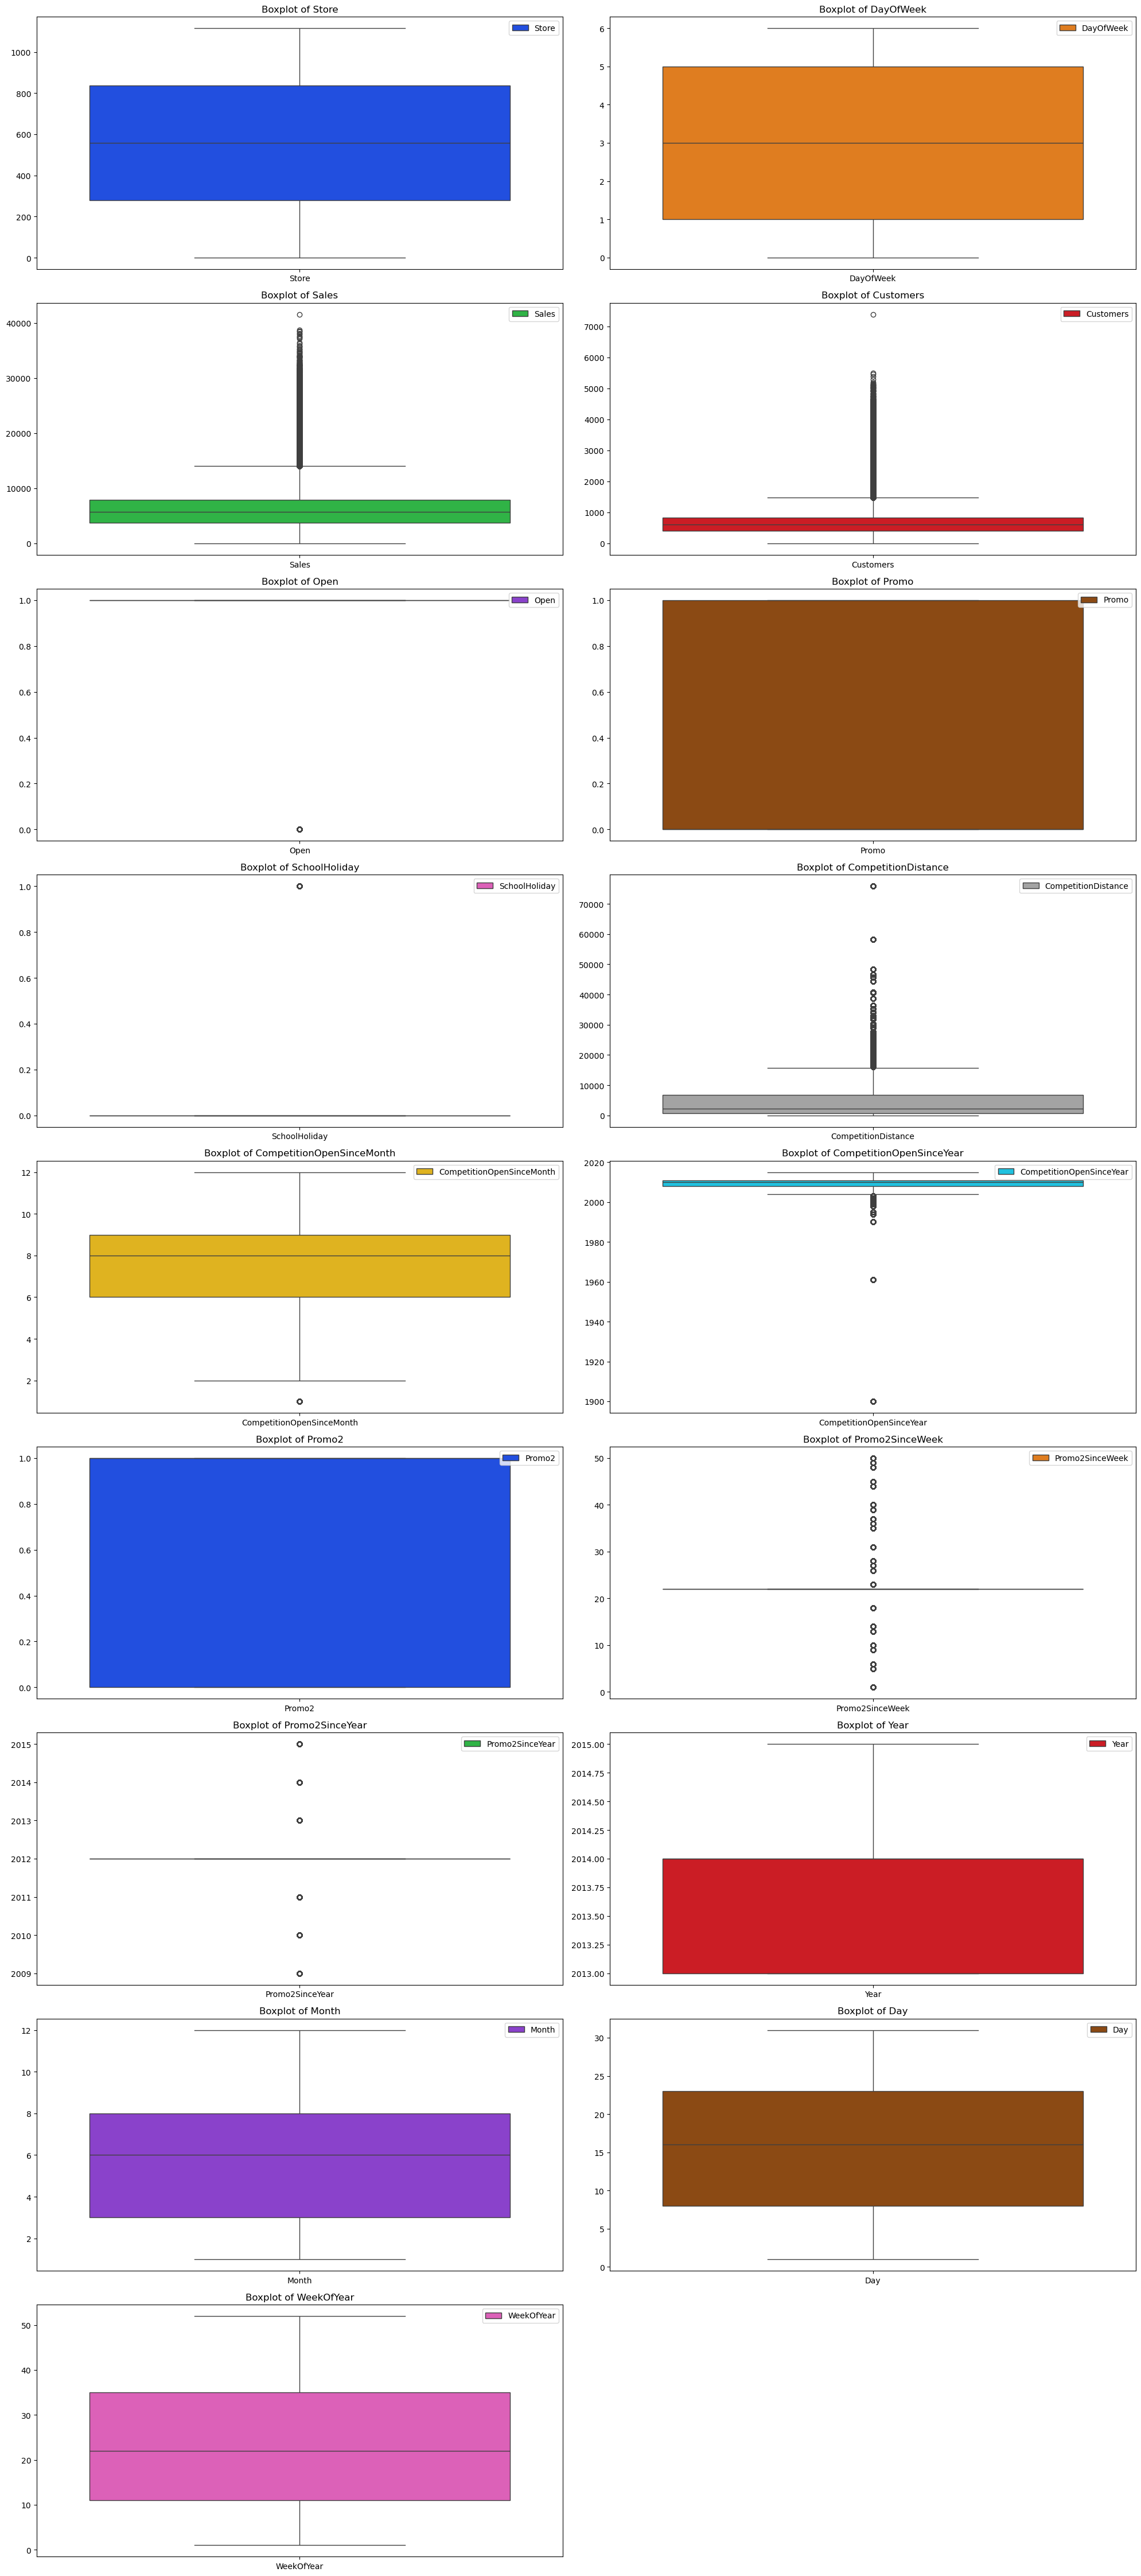

In [40]:
#Here, we have checked for outliers using a boxplot
numeric_cols = train_store.select_dtypes(include=['number']).columns

num_rows = (len(numeric_cols) + 1) // 2

fig, axes = plt.subplots(ncols=2, nrows=num_rows, figsize=(20, num_rows * 5))
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=train_store[[col]], ax=axes[i//2][i%2], color=sns.color_palette("bright", len(numeric_cols))[i])
    axes[i//2][i%2].set_title(f'Boxplot of {col}')
    axes[i//2][i%2].legend([col], loc='upper right')
for j in range(len(numeric_cols), num_rows * 2):
    fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()

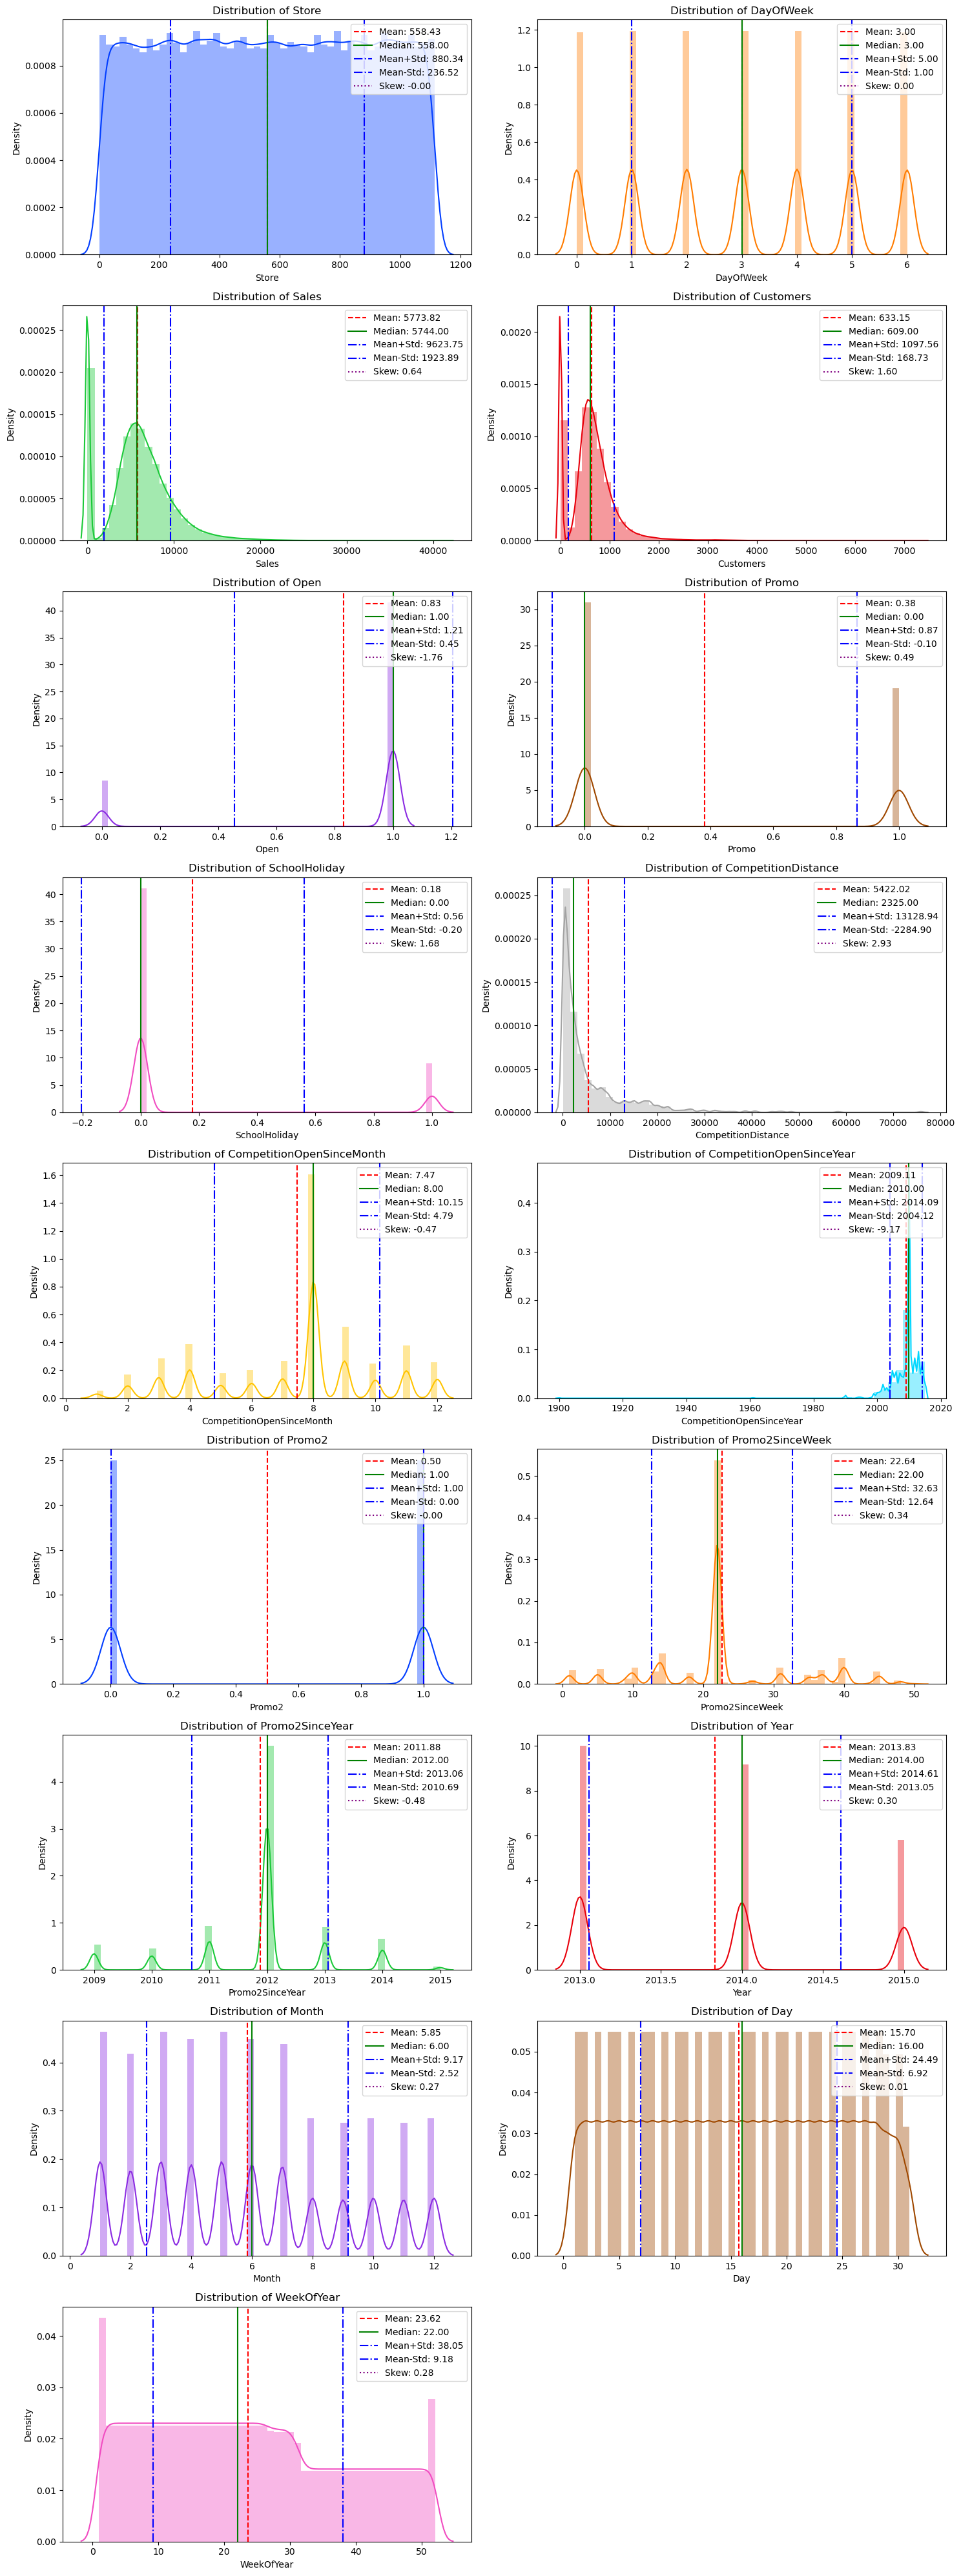

In [41]:
#Here we are checking the data through distplot to see how much each column is skewed
numeric_cols = train_store.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 40))
for i, col in enumerate(numeric_cols):
    ax = plt.subplot(len(numeric_cols) // 2 + 1, 2, i + 1)
    
    sns.distplot(train_store[col], 
                 color=sns.color_palette("bright", len(numeric_cols))[i], 
                 kde=True,
                 ax=ax)
    ax.set_title(f'Distribution of {col}')
    
    mean = train_store[col].mean()
    std_dev = train_store[col].std()
    median = train_store[col].median()
    skewness = train_store[col].skew()
    
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    ax.axvline(mean + std_dev, color='blue', linestyle='-.', label=f'Mean+Std: {mean + std_dev:.2f}')
    ax.axvline(mean - std_dev, color='blue', linestyle='-.', label=f'Mean-Std: {mean - std_dev:.2f}')
    skew_line = Line2D([], [], color='purple', linestyle=':', label=f'Skew: {skewness:.2f}')
    handles, labels = ax.get_legend_handles_labels()
    handles.append(skew_line)
    labels.append(f'Skew: {skewness:.2f}')
    
    ax.legend(handles=handles, loc='upper right')

plt.tight_layout()
plt.show()

In [42]:
# Here, we have calculated the number of outliers for each column
num_cols = train_store.select_dtypes(include='number')

Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))
num_outliers = outliers.sum()
color_mapping = {
    "red": "\033[1;91m",       
    "yellow": "\033[1;93m",    
    "green": "\033[1;92m",     
    "cyan": "\033[1;96m",      
    "blue": "\033[1;94m",      
    "magenta": "\033[1;95m",   
    "white": "\033[1;97m"     
}
reset_color = "\033[0m"  
color_names = ["red", "yellow", "green", "cyan", "blue", "magenta", "white"]
print("Columns with potential outliers:")
for i, (column, count) in enumerate(num_outliers.items()):
    if count > 0:  
        color_name = color_names[i % len(color_names)]  
        row_color = color_mapping[color_name] 
        print(f"{row_color}{column}: {count} outliers{reset_color}")

Columns with potential outliers:
Sales: 26694 outliers
Customers: 38095 outliers
Open: 172817 outliers
SchoolHoliday: 181721 outliers
CompetitionDistance: 99160 outliers
CompetitionOpenSinceMonth: 12452 outliers
CompetitionOpenSinceYear: 83904 outliers
Promo2SinceWeek: 480484 outliers
Promo2SinceYear: 436004 outliers


In [43]:
# Here, outliers have been capped using the IQR (Interquartile Range) method for each column
# Here, we have skipped the columns where the IQR (Interquartile Range) variability is 0 because it was causing all the values in those columns to be converted to 0

numerical_columns = train_store.select_dtypes(include=['number']).columns

def cap_outliers(train_store, column):
    Q1 = train_store[column].quantile(0.25)
    Q3 = train_store[column].quantile(0.75)
    IQR = Q3 - Q1
    if IQR == 0:
        print(Fore.RED + f"Skipping column '{column}' as it has no variability (IQR=0).")
        print(Style.RESET_ALL) 
        return train_store[column]
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    capped = np.where(train_store[column] < lower_bound, lower_bound,
                      np.where(train_store[column] > upper_bound, upper_bound, train_store[column]))
    print(Fore.GREEN + f"Capped values for column '{column}' using IQR method.")
    print(Style.RESET_ALL) 
    return capped.astype(train_store[column].dtype)

for column in numerical_columns:
    train_store[column] = cap_outliers(train_store, column)

print(Fore.CYAN + str(train_store.describe()))
print(Style.RESET_ALL) 

Capped values for column 'Store' using IQR method.

Capped values for column 'DayOfWeek' using IQR method.

Capped values for column 'Sales' using IQR method.

Capped values for column 'Customers' using IQR method.

Skipping column 'Open' as it has no variability (IQR=0).

Capped values for column 'Promo' using IQR method.

Skipping column 'SchoolHoliday' as it has no variability (IQR=0).

Capped values for column 'CompetitionDistance' using IQR method.

Capped values for column 'CompetitionOpenSinceMonth' using IQR method.

Capped values for column 'CompetitionOpenSinceYear' using IQR method.

Capped values for column 'Promo2' using IQR method.

Skipping column 'Promo2SinceWeek' as it has no variability (IQR=0).

Skipping column 'Promo2SinceYear' as it has no variability (IQR=0).

Capped values for column 'Year' using IQR method.

Capped values for column 'Month' using IQR method.

Capped values for column 'Day' using IQR method.

Capped values for column 'WeekOfYear' using IQR method

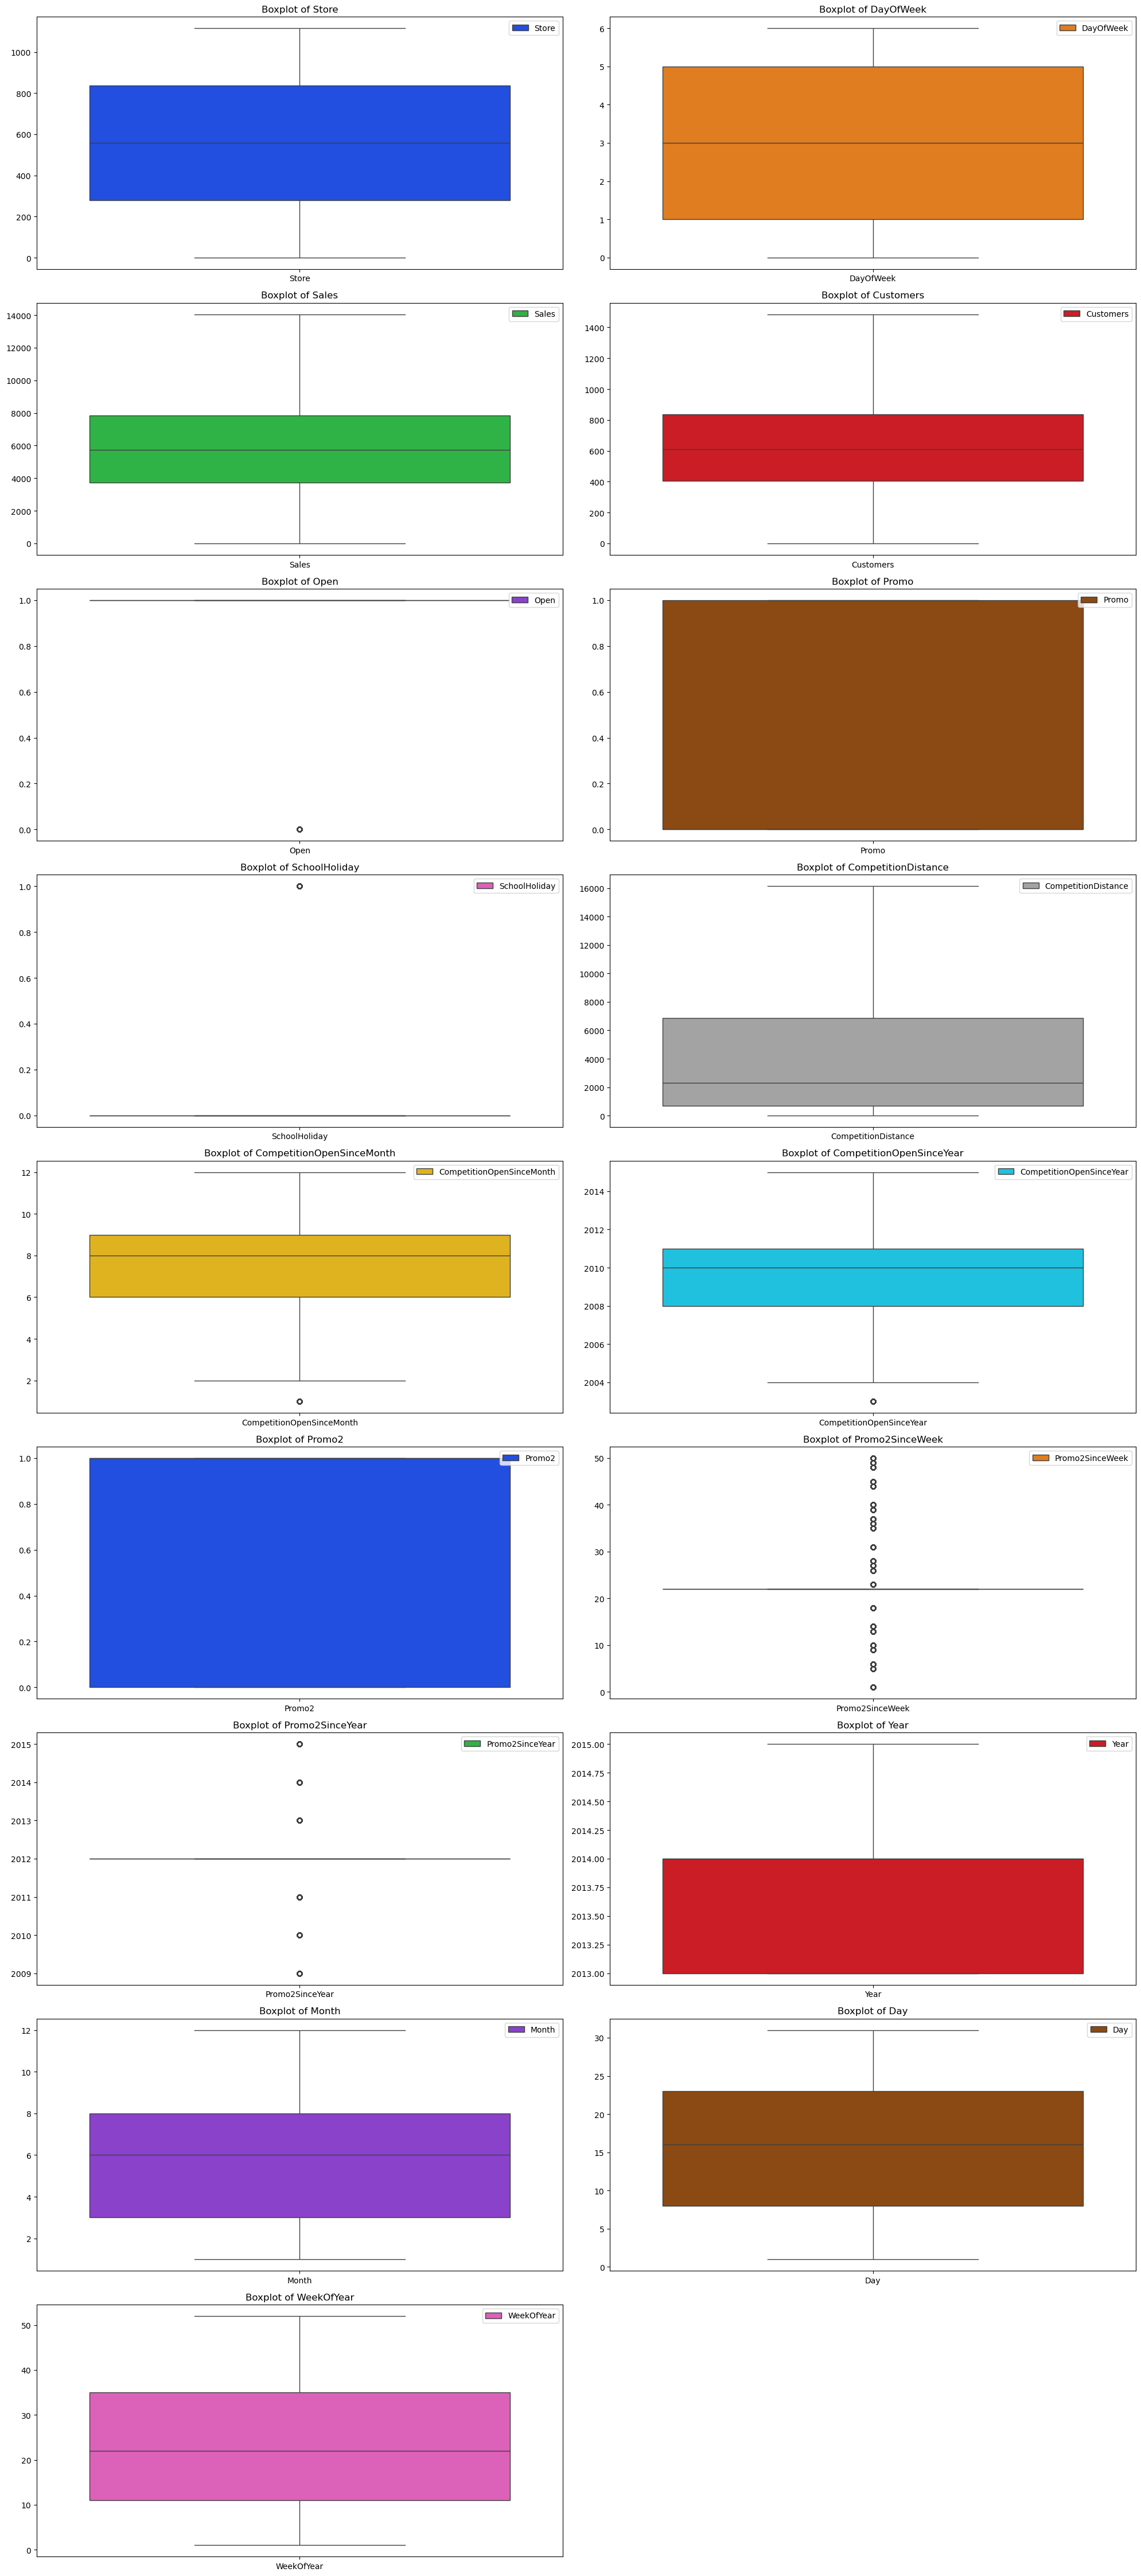

In [44]:
numeric_cols = train_store.select_dtypes(include=['number']).columns

num_rows = (len(numeric_cols) + 1) // 2

fig, axes = plt.subplots(ncols=2, nrows=num_rows, figsize=(20, num_rows * 5))
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=train_store[[col]], ax=axes[i//2][i%2], color=sns.color_palette("bright", len(numeric_cols))[i])
    axes[i//2][i%2].set_title(f'Boxplot of {col}')
    axes[i//2][i%2].legend([col], loc='upper right')
for j in range(len(numeric_cols), num_rows * 2):
    fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📚Task 1-Exploration of customer purchasing behaviour📚</b></div>

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨ Distribution of Promotions in Training and Test Sets ✨ </b>
</div>

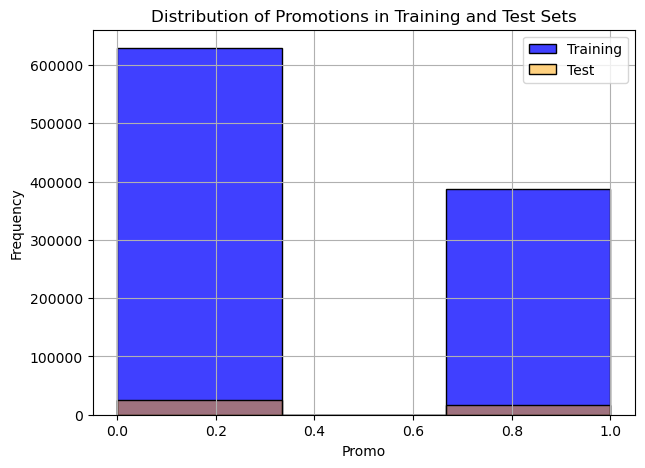

In [45]:
# Function to check promo distribution in training and test sets
def analyze_promo_distribution(train, test):
    logger.info("Analyzing distribution of promotions in training and test sets...")
    try:
        plt.figure(figsize=(7, 5))
        sns.histplot(train['Promo'], label='Training', kde=False, bins=3, color='blue')
        sns.histplot(test['Promo'], label='Test', kde=False, bins=3, color='orange', alpha=0.5)
        plt.title('Distribution of Promotions in Training and Test Sets')
        plt.xlabel('Promo')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid()
        plt.show()
        logger.info("Plotted distribution of promotions in training and test sets.")
    except Exception as e:
        logger.error(f"Error plotting distribution of promotions: {e}")

try:
    analyze_promo_distribution(train_store, test_store)
    logger.info("Graph formed successfully.")
except Exception as e:
    logger.error(f"Error during EDA: {e}")

# Insights 


1. **Imbalance in Promo Values** – The training set contains significantly more data points than the test set, with around 600,000 entries for promo value 0 and 400,000 for promo value 1. This suggests an uneven distribution, which might affect model generalization.

2. **Limited Representation in the Test Set** – The test set has only a small fraction of the total data compared to the training set. If the promotional effect needs to be studied, ensuring the test set has a representative sample would be crucial.

3. **Possible Bias in Training** – Since the training set has more instances of promo value 0 than 1, models trained on this data may be biased toward predicting non-promo cases more often. Techniques like balancing classes or adjusting sample weights might be worth considering.

4. **Implications for Performance Evaluation** – If the test set distribution does not resemble real-world data, model evaluation could be misleading. Cross-validation or additional sampling strategies could help mitigate this issue.

5. **Severe Class Imbalance**: The dataset exhibits extreme class imbalance with approximately 85-90% of cases having no promotions (Promo = 0) and only 10-15% having promotions (Promo = 1). This creates several challenges for machine learning models.

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Sales Behavior Around Holidays✨ </b>
</div>

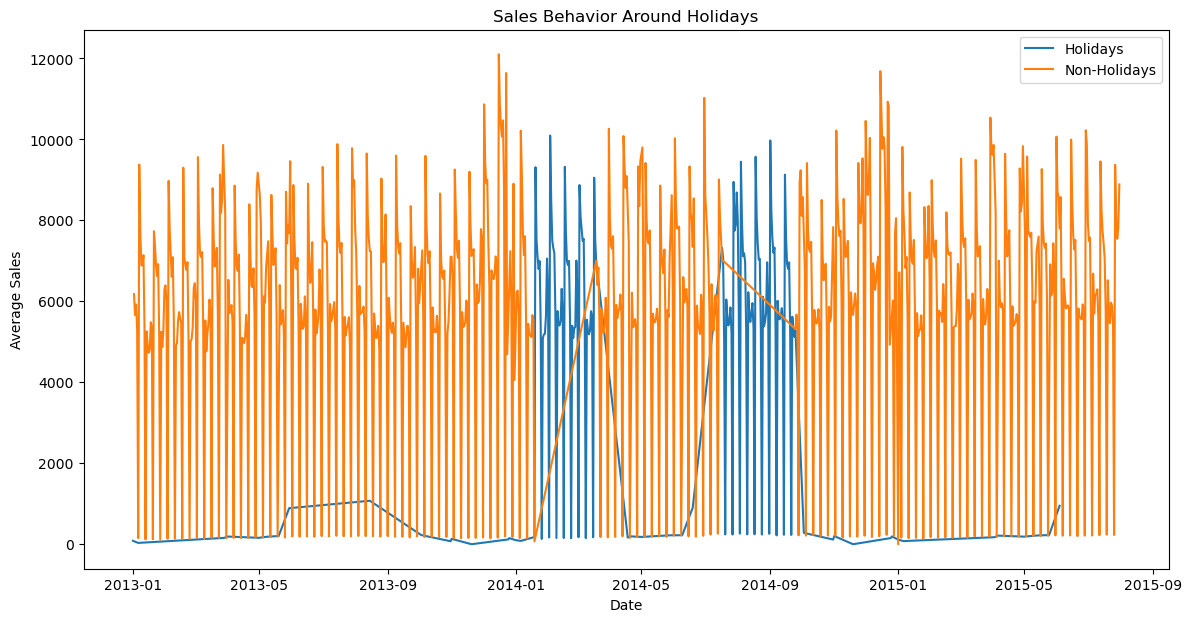

In [46]:
# Function to analyze sales behavior around holidays
def analyze_holiday_sales_behavior(data):
    logger.info("Analyzing sales behavior around holidays...")
    try:
        holidays = data[data['StateHoliday'] != '0']
        non_holidays = data[data['StateHoliday'] == '0']

        plt.figure(figsize=(14, 7))
        sns.lineplot(data=holidays.groupby('Date')['Sales'].mean(), label='Holidays')
        sns.lineplot(data=non_holidays.groupby('Date')['Sales'].mean(), label='Non-Holidays')
        plt.title('Sales Behavior Around Holidays')
        plt.xlabel('Date')
        plt.ylabel('Average Sales')
        plt.legend()
        plt.show()
        logger.info("Plotted sales behavior around holidays.")
    except Exception as e:
        logger.error(f"Error plotting sales behavior around holidays: {e}")
        
try:
    analyze_holiday_sales_behavior(train_store)
    logger.info("Graph formed successfully.")
except Exception as e:
    logger.error(f"Error during EDA: {e}")

# Insights :

**Clear Holiday Sales Spikes**: There are distinct periods where sales dramatically increase during holidays (blue lines), reaching peaks of 12,000+ compared to typical non-holiday sales of 6,000-8,000. This represents roughly 50-100% increases in sales volume.

**Seasonal Holiday Patterns**: The major sales spikes appear to follow a consistent annual pattern, likely corresponding to:
- Winter holidays (December/January) - showing the highest peaks
- Summer periods (possibly vacation seasons)
- Other recurring holiday periods throughout the year

**Holiday Duration Impact**: Holiday periods appear to last several weeks rather than single days, suggesting extended shopping seasons around major holidays. The Christmas/New Year period shows particularly sustained high sales over 4-6 weeks.

**Baseline Sales Stability**: Non-holiday sales (orange) remain relatively stable around 6,000-8,000 units with normal fluctuations, indicating consistent underlying demand.

**Business Implications**:
- **Inventory Planning**: Retailers need to stock 2-3x normal inventory levels during peak holiday periods
- **Staffing**: Significant workforce scaling required during holiday seasons
- **Marketing ROI**: Holiday periods offer maximum return on advertising investment
- **Cash Flow**: Major revenue concentration in holiday periods requires careful financial planning

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Sales Distribution: Holiday vs Non-Holiday✨ </b>
</div>

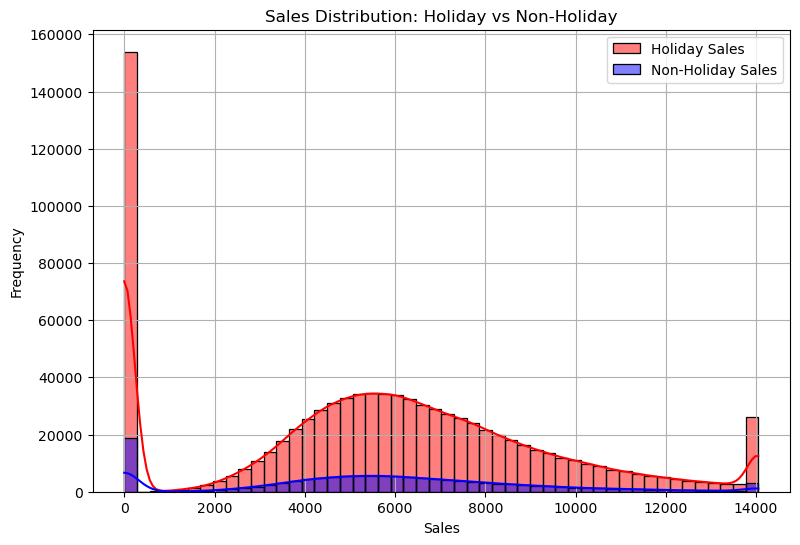

In [47]:
# Compare sales behavior before, during, and after holidays
holiday_sales = train_store[train_store['StateHoliday'] != 0]
non_holiday_sales = train_store[train_store['StateHoliday'] == 0]
plt.figure(figsize=(9, 6))
sns.histplot(holiday_sales['Sales'], bins=50, kde=True, label='Holiday Sales', color='red')
sns.histplot(non_holiday_sales['Sales'], bins=50, kde=True, label='Non-Holiday Sales', color='blue')
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()

# Insights 

**Dramatically Different Sales Patterns**:
- **Non-Holiday Sales (Blue)**: Heavily concentrated in the 0-2,000 range with an extremely right-skewed distribution. The vast majority of non-holiday days have very low sales volumes.
- **Holiday Sales (Red)**: Show a much broader, more normal distribution spanning from 2,000 to 14,000+ sales, with a peak around 6,000-7,000.

**Volume and Variability Differences**:
- Holiday sales show much higher average volumes and greater variability
- Non-holiday sales are predictably low with little variation
- The highest sales volumes (10,000+) occur almost exclusively during holidays

**Business Calendar Impact**:
- The extreme spike at near-zero sales suggests many non-holiday days have minimal activity
- Holiday periods drive the majority of high-volume sales days
- There's virtually no overlap in the typical sales ranges between holiday and non-holiday periods

**Strategic Implications**:
- **Revenue Concentration**: A small number of holiday days likely generate a disproportionate share of annual revenue
- **Operational Planning**: Two completely different operational modes needed - minimal staffing/inventory for non-holidays vs. maximum capacity for holidays
- **Risk Management**: Heavy dependence on holiday performance creates business vulnerability
- **Marketing Focus**: Marketing spend should be heavily concentrated during holiday periods for maximum ROI

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Seasonal Purchase Behaviors✨ </b>
</div>

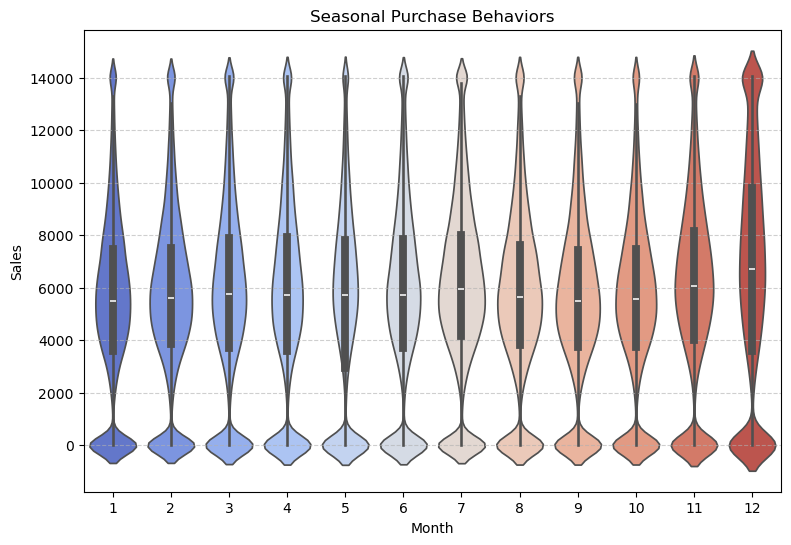

In [48]:
# Function to analyze seasonal purchase behaviors
def analyze_seasonal_behaviors(data):
    logger.info("Analyzing seasonal purchase behaviors...")
    try:
        plt.figure(figsize=(9, 6))
        sns.violinplot(x='Month', y='Sales', data=data, palette="coolwarm")
        plt.title('Seasonal Purchase Behaviors')
        plt.xlabel('Month')
        plt.ylabel('Sales')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()
        logger.info("Plotted seasonal purchase behaviors using violin plot.")
    except Exception as e:
        logger.error(f"Error plotting seasonal purchase behaviors: {e}")

try:
    analyze_seasonal_behaviors(train_store)
    logger.info("Graph formed successfully.")
except Exception as e:
    logger.error(f"Error during EDA: {e}")

# Insights 

1. **Imbalanced Promo Distribution** – The training set contains significantly more data points than the test set, with promo value 0 having a much higher frequency than promo value 1. This can affect how well the model generalizes.

2. **Limited Representation in the Test Set** – The test set has a much lower number of entries compared to the training set. If the goal is to analyze promotion effects, ensuring the test set has a representative sample could be critical.

3. **Potential Bias in Model Predictions** – Since promo value 0 is dominant in the training set, the model may lean towards predicting non-promo cases more often. Applying class balancing techniques or adjusting sample weights could help mitigate this.

4. **Implications for Model Evaluation** – If the test set distribution doesn’t resemble real-world data, model evaluation might be misleading. Cross-validation or sampling strategies could improve robustness.

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Average Monthly Sales✨ </b>
</div>

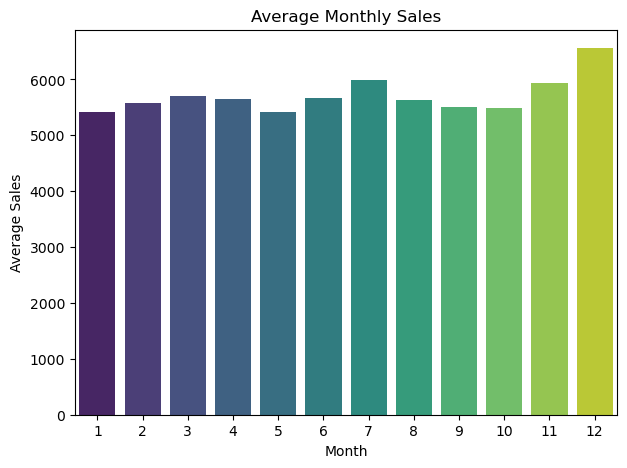

In [49]:
# Seasonal purchase behavior (e.g., Christmas, Easter)
train_store['Month'] = train_store['Date'].dt.month
seasonal_sales = train_store.groupby('Month')['Sales'].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='Month', y='Sales', data=seasonal_sales, palette='viridis')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

# Insights 

**Distinct Seasonal Patterns**:
- **Q1 (Jan-Mar)**: Relatively stable sales around 5,600-5,800, likely reflecting post-holiday normalization
- **Q2 (Apr-Jun)**: Gradual decline from ~5,700 to ~5,700, with a notable dip in May (~5,400)
- **Q3 (Jul-Sep)**: Mixed performance with July peaking at ~6,000, followed by decline through September (~5,500)
- **Q4 (Oct-Dec)**: Strong upward trend, with December showing the highest sales at ~6,700

**Key Seasonal Drivers**:
- **December Peak**: The highest average monthly sales (~6,700) confirm strong holiday shopping impact
- **July Summer High**: Secondary peak suggests summer seasonal demand (vacation, back-to-school prep, or summer products)
- **May Dip**: Lowest point may indicate post-spring/pre-summer lull
- **Q4 Momentum**: Clear building pattern from October through December

**Business Implications**:
- **Inventory Management**: Plan for 20%+ higher inventory needs in December vs. May
- **Cash Flow**: Expect strongest revenue in Q4, plan for lower cash generation in late Q2/early Q3
- **Staffing**: Seasonal hiring most critical for Q4, with secondary needs in July
- **Marketing Budget**: Concentrate spending in Q4 and July for maximum impact

**Forecasting Considerations**:
- Monthly seasonality is a strong predictor with ~20% variation between peak and trough
- December consistently outperforms other months
- The pattern suggests consumer-driven business with holiday dependency
- Mid-year (May-September) shows more volatility, requiring closer monitoring

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Correlation Between Sales and Number of Customers✨ </b>
</div>

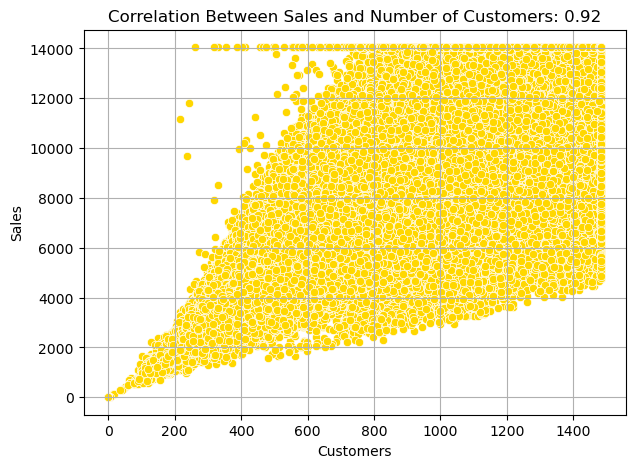

In [50]:
# Function to analyze correlation between sales and number of customers
def analyze_sales_customer_correlation(data):
    logger.info("Analyzing correlation between sales and number of customers...")
    try:
        correlation = data[['Sales', 'Customers']].corr().iloc[0, 1]
        logger.info(f"Correlation between Sales and Number of Customers: {correlation:.2f}")

        plt.figure(figsize=(7, 5))
        sns.scatterplot(x='Customers', y='Sales', data=data, color = 'gold')
        plt.title(f'Correlation Between Sales and Number of Customers: {correlation:.2f}')
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.grid()
        plt.show()
        logger.info("Plotted correlation between sales and number of customers.")
    except Exception as e:
        logger.error(f"Error plotting correlation between sales and number of customers: {e}")

try:
    analyze_sales_customer_correlation(train_store)
    logger.info("Graph formed successfully.")
except Exception as e:
    logger.error(f"Error during EDA: {e}")

# Insights 

**Strong Positive Relationship**: The correlation of 0.92 indicates a very strong positive linear relationship between the number of customers and sales. This is an extremely high correlation, suggesting that customer count is an excellent predictor of sales performance.

**Consistent Customer Value**: The tight linear pattern suggests that each additional customer contributes relatively consistently to sales revenue. There's minimal scatter around the trend line, indicating predictable customer behavior.

**Scalability Evidence**: The relationship holds across the entire range (from near 0 to 1,400+ customers), suggesting the business model scales well. Sales grow proportionally with customer base without apparent diminishing returns.

**Business Implications**:
- Customer acquisition should be a primary focus since more customers directly translate to higher sales
- Revenue forecasting can be done reliably using customer count
- The business appears to have consistent pricing or purchase patterns across its customer base
- Marketing and sales efforts should prioritize customer growth over trying to increase spend per customer.

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Effect of Promotions on Sales✨ </b>
</div>

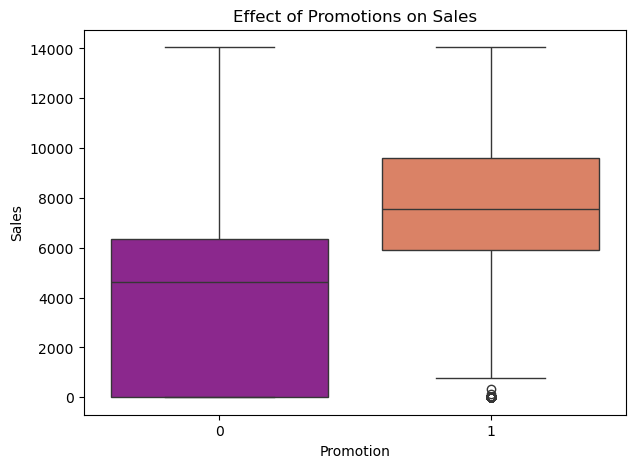

In [51]:
# Function to analyze the effect of promotions on sales
def analyze_promo_effects(data):
    logger.info("Analyzing the effect of promotions on sales...")
    try:
        plt.figure(figsize=(7, 5))
        sns.boxplot(x='Promo', y='Sales', data=data, palette= 'plasma')
        plt.title('Effect of Promotions on Sales')
        plt.xlabel('Promotion')
        plt.ylabel('Sales')
        plt.show()
        logger.info("Plotted the effect of promotions on sales.")
    except Exception as e:
        logger.error(f"Error plotting the effect of promotions on sales: {e}")

try:
    analyze_promo_effects(train_store)
    logger.info("Graph formed successfully.")
except Exception as e:
    logger.error(f"Error during EDA: {e}")

# Insights 

1. **Sales Increase with Promotion**: The median sales for promoted products (orange box) are notably higher than those without promotions (purple box), indicating that promotions drive sales upward.

2. **Greater Variability in Promoted Sales**: The interquartile range (IQR) for promoted products is larger, showing a wider spread of sales values. This suggests that while promotions boost sales overall, the effect might vary significantly across different products or timeframes.

3. **Outliers in Promoted Sales**: The box plot for promoted products reveals more extreme low values compared to non-promoted products, implying that while most promoted items perform well, some may not experience significant gains.

4. **Similar Maximum Sales Values**: Although promotions generally increase median sales, the highest recorded sales values remain comparable across both groups, meaning other factors beyond promotions may contribute to peak sales performance.


<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Sales& customer Distribution with and without Promotions✨ </b>
</div>

<Figure size 1200x600 with 0 Axes>

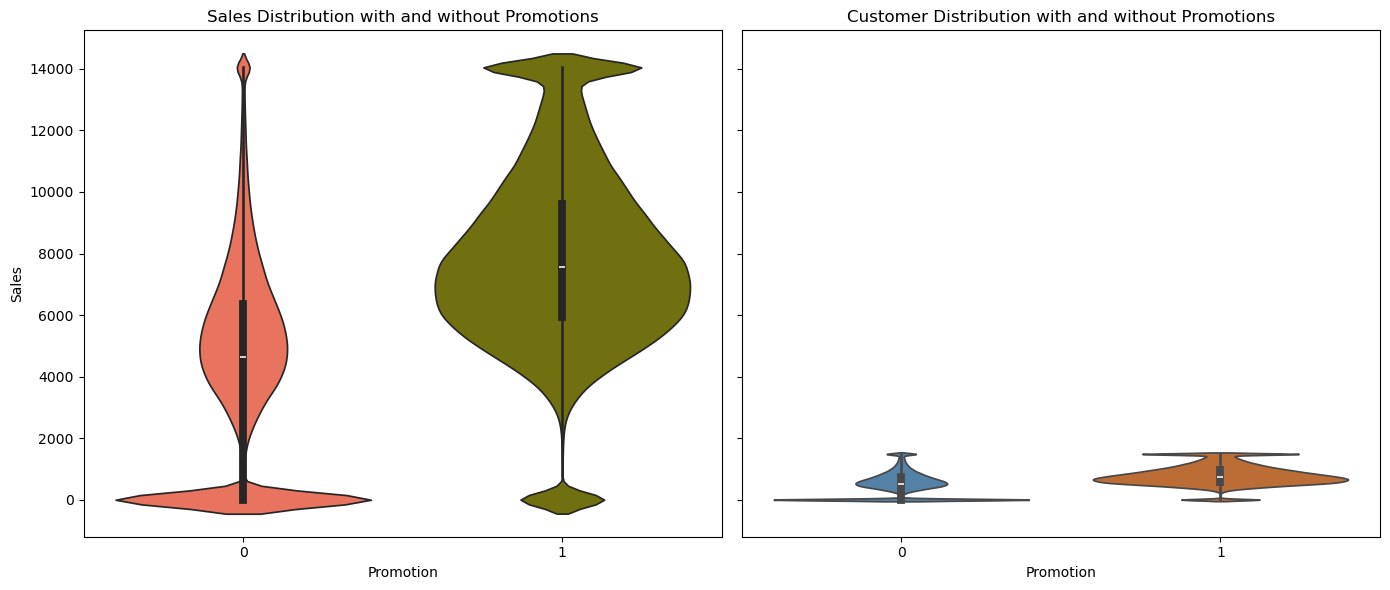

In [52]:
# Could the Promos be Deployed in More Effective Ways? Which Stores Should Promos be Deployed In?
def analyze_promo_effectiveness(data):
    promo_data = data[data['Promo'] == 1]
    non_promo_data = data[data['Promo'] == 0]
    plt.figure(figsize=(12, 6)) 
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    sns.violinplot(x='Promo', y='Sales', data=data, ax=axes[0], palette=['tomato', 'olive'])
    axes[0].set_title('Sales Distribution with and without Promotions')
    axes[0].set_xlabel('Promotion')
    axes[0].set_ylabel('Sales')

    sns.violinplot(x='Promo', y='Customers', data=data, ax=axes[1], palette=['steelblue', 'chocolate'])
    axes[1].set_title('Customer Distribution with and without Promotions')
    axes[1].set_xlabel('Promotion')
    axes[1].set_ylabel('Customers')
    plt.tight_layout()
    plt.show()

try:
    analyze_promo_effectiveness(train_store)
    logger.info("Graph formed successfully.")
except Exception as e:
    logger.error(f"Error during visualization: {e}")

# Insights 

**Sales Impact of Promotions**:
- **Sales Boost**: Promotions (1) generate significantly higher sales than non-promotional periods (0). The promotional sales   distribution is much wider and extends to around 14,000, while non-promotional sales rarely exceed 6,000.
- **Higher Variability with Promotions**: The promotional sales distribution is much broader, indicating greater variability in outcomes - some promotions are extremely successful while others perform more moderately.
- **Consistent Base Performance**: Non-promotional sales show a tighter, more predictable distribution centered around 2,000-4,000.

**Customer Behavior Patterns**:
- **Promotions Don't Significantly Increase Customer Count**: The customer distributions are very similar between promotional (1) and non-promotional (0) periods. Both hover around 400-600 customers.
- **Same Customers, Higher Spending**: This suggests promotions work primarily by increasing spending per customer rather than attracting new customers.

**Strategic Implications**:
- **Promotions Drive Revenue Per Customer**: The key mechanism is existing customers purchasing more or higher-value items during promotions
- **Customer Acquisition vs. Revenue Growth**: If the goal is customer acquisition, current promotional strategies may need adjustment. If the goal is revenue maximization from existing customers, they're highly effective.
- **Predictable Base vs. Variable Promotional Returns**: Businesses can rely on steady baseline performance but should expect variable results from promotional campaigns.

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Customer Behavior During Store Open and Closing Times✨ </b>
</div>

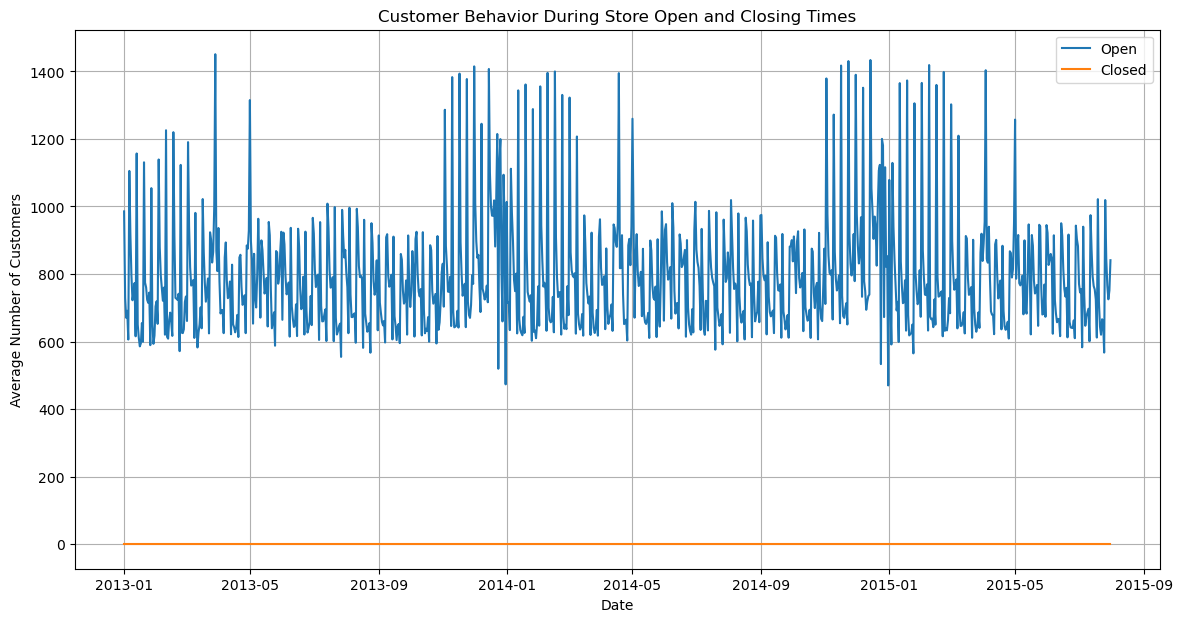

In [53]:
# Function to analyze customer behavior during store open and closing times
def analyze_open_close_customer_behavior(data):
    logger.info("Analyzing customer behavior during store open and closing times...")
    try:
        open_stores = data[data['Open'] == 1]
        closed_stores = data[data['Open'] == 0]

        plt.figure(figsize=(14, 7))
        sns.lineplot(data=open_stores.groupby('Date')['Customers'].mean(), label='Open')
        sns.lineplot(data=closed_stores.groupby('Date')['Customers'].mean(), label='Closed')
        plt.title('Customer Behavior During Store Open and Closing Times')
        plt.xlabel('Date')
        plt.ylabel('Average Number of Customers')
        plt.legend()
        plt.grid()
        plt.show()
        logger.info("Plotted customer behavior during store open and closing times.")
    except Exception as e:
        logger.error(f"Error plotting customer behavior during store open and closing times: {e}")

try:
    analyze_open_close_customer_behavior(train_store)
    logger.info("Graph formed successfully.")
except Exception as e:
    logger.error(f"Error during EDA: {e}")

# Insights

**Store Status Impact**:
- **Open Store Dominance**: The blue line (Open) shows all the customer activity, ranging from approximately 500 to 1,400+ customers
- **No Activity When Closed**: The orange line (Closed) remains flat at zero throughout the entire period, confirming that no customers are recorded when the store is closed

**Temporal Patterns**:
- **Seasonal Trends**: There appear to be cyclical patterns with higher customer peaks occurring roughly annually, suggesting seasonal business cycles
- **Peak Performance Periods**: The highest customer counts (1,400+) occur during specific periods, likely corresponding to holiday seasons or promotional campaigns
- **Baseline Fluctuation**: Even during "normal" periods, customer counts fluctuate significantly between 600-1,000, indicating natural business volatility

**Business Insights**:
- **Predictable Seasonality**: The recurring annual peaks suggest the business can anticipate and prepare for high-traffic periods
- **Consistent Operations**: The complete absence of customers during closed periods indicates good data integrity and clear operational boundaries
- **Growth Opportunities**: The significant variation in customer counts suggests potential for understanding what drives peak performance and replicating those conditions

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Weekend Sales for Stores Open on All Weekdays✨ </b>
</div>

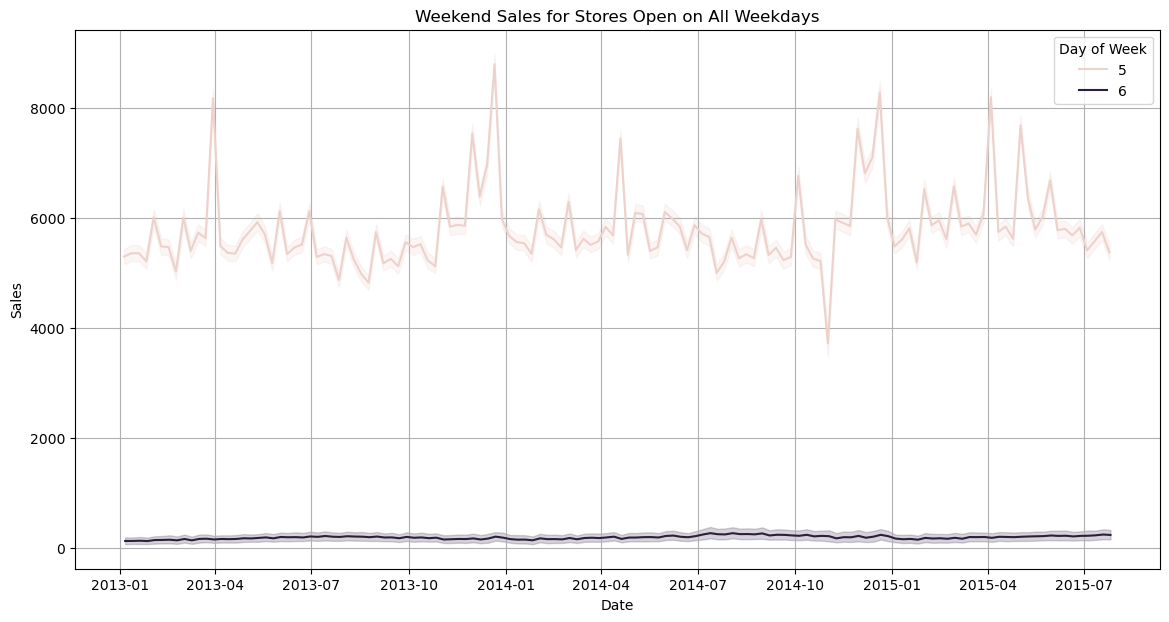

In [54]:
# Which Stores are Opened on All Weekdays? How Does That Affect Their Sales on Weekends?
# Function to analyze store opening patterns
def analyze_weekday_opening(data):
    weekday_open = data[data['DayOfWeek'] < 5].groupby('Store')['Open'].sum()
    all_week_open_stores = weekday_open[weekday_open >= 5].index
    
    weekend_sales = data[(data['Store'].isin(all_week_open_stores)) & (data['DayOfWeek'] >= 5)]
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='Date', y='Sales', hue='DayOfWeek', data=weekend_sales)
    plt.title('Weekend Sales for Stores Open on All Weekdays')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend(title='Day of Week')
    plt.grid()
    plt.show()
    
try:
    analyze_weekday_opening(train_store)
    logger.info("Graph formed successfully.")
except Exception as e:
    logger.error(f"Error during EDA: {e}")

# Insights 

**Weekend Performance Disparity**:
- **Saturday Dominance**: Day 5 (Saturday) shows significantly higher sales, typically ranging from 5,000-6,000 with occasional spikes up to 9,000+
- **Sunday Underperformance**: Day 6 (Sunday) consistently shows very low sales, rarely exceeding 400 and often staying below 200

**Seasonal and Temporal Patterns**:
- **Holiday Spikes**: The dramatic peaks in Saturday sales (reaching 9,000+) likely correspond to holiday shopping periods or major promotional events
- **Consistent Sunday Pattern**: Sunday sales remain consistently low throughout the entire 2013-2015 period, suggesting this is a structural pattern rather than seasonal
- **Saturday Volatility**: Saturday sales show much more variation, indicating they're more responsive to external factors like promotions, seasons, or market conditions

**Business Implications**:
- **Resource Allocation**: The dramatic difference suggests Sunday operations may not be cost-effective. Staff scheduling should heavily favor Saturday
- **Marketing Focus**: Promotional efforts should concentrate on Saturday when customer engagement is highest
- **Store Hours**: Consider whether Sunday operations are profitable given the consistently low sales volumes

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Sales: Weekends vs Weekdays for Stores Open All Week✨ </b>
</div>

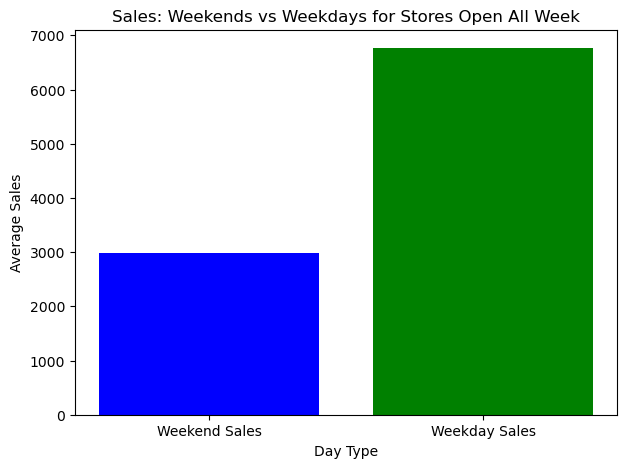

In [55]:
# Stores opened on all weekdays
open_weekdays = train_store.groupby('Store')['DayOfWeek'].nunique()
stores_open_all_week = open_weekdays[open_weekdays == 7].index

weekend_sales = train_store[(train_store['Store'].isin(stores_open_all_week)) & 
                            (train_store['DayOfWeek'].isin([5, 6]))]['Sales'].mean()

non_weekend_sales = train_store[(train_store['Store'].isin(stores_open_all_week)) & 
                                (train_store['DayOfWeek'].isin([0, 1, 2, 3, 4]))]['Sales'].mean()

plt.figure(figsize=(7, 5))
plt.bar(['Weekend Sales', 'Weekday Sales'], [weekend_sales, non_weekend_sales], color=['blue', 'green'])
plt.title('Sales: Weekends vs Weekdays for Stores Open All Week')
plt.xlabel('Day Type')
plt.ylabel('Average Sales')
plt.show()

# Insights 

**Weekday Dominance**:
- **Weekdays Significantly Outperform**: Weekday sales (6,800) are more than double weekend sales (~3,000), showing a 2.3x difference
- **Counter-Intuitive Pattern**: This goes against typical retail expectations where weekends often drive higher consumer traffic

**Business Model Implications**:
- **B2B Focus**: This pattern strongly suggests a business-to-business model or one serving working professionals during business hours
- **Commercial Customer Base**: The higher weekday performance indicates customers who shop during work hours rather than leisure time
- **Professional Services**: Could indicate office supplies, business services, or industrial products where purchasing happens during business operations

**Operational Insights**:
- **Staffing Strategy**: Primary staffing and inventory should focus on weekdays, with reduced weekend operations
- **Marketing Timing**: Promotional campaigns should target weekday periods for maximum impact
- **Cost Optimization**: Weekend operations may be running at suboptimal efficiency given the lower sales volume

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Effect of Assortment Type on Sales✨ </b>
</div>

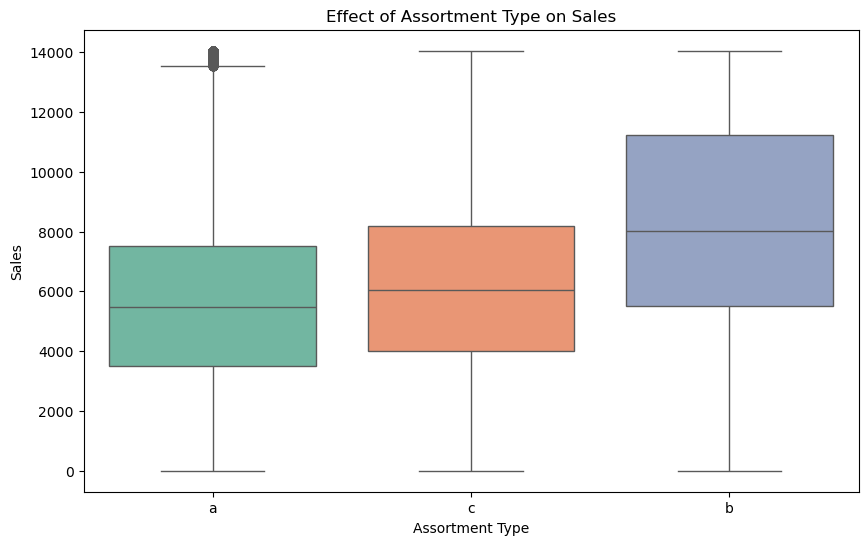

In [56]:
# Function to analyze the effect of assortment type on sales
def analyze_assortment_effect(data):
    logger.info("Analyzing the effect of assortment type on sales...")
    try:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Assortment', y='Sales', data=data, palette='Set2')
        plt.title('Effect of Assortment Type on Sales')
        plt.xlabel('Assortment Type')
        plt.ylabel('Sales')
        plt.show()
        logger.info("Plotted effect of assortment type on sales.")
    except Exception as e:
        logger.error(f"Error plotting effect of assortment type on sales: {e}")
        
try:
    analyze_assortment_effect(train_store)
    logger.info("Graph formed successfully.")
except Exception as e:
    logger.error(f"Error during EDA: {e}")

# Insights 

**Performance Hierarchy**:
- **Assortment 'b' (Best Performer)**: Shows the highest median sales (~8,000) and consistently strong performance with most values between 5,500-11,500
- **Assortment 'c' (Moderate Performer)**: Has a median around 6,000 with a wide distribution, showing high variability in performance
- **Assortment 'a' (Lowest Performer)**: Shows the lowest median sales (~5,500) with the most compact distribution

**Variability Insights**:
- **Assortment 'b'**: Most consistent high performance with relatively tight interquartile range
- **Assortment 'c'**: Highest variability - can perform very well (up to 14,000) but also has many low-performing instances
- **Assortment 'a'**: Most predictable but consistently lower performance, with some notable outliers reaching 14,000

**Strategic Implications**:
- **Focus on Assortment 'b'**: This appears to be the most reliable high-performing assortment type
- **Optimize Assortment 'c'**: High potential but inconsistent - investigate what factors make some 'c' stores perform exceptionally well
- **Evaluate Assortment 'a'**: Consider whether this assortment type needs restructuring or if it serves a specific market niche

**Business Recommendations**:
- **Expansion Strategy**: Prioritize assortment 'b' for new locations
- **Performance Analysis**: Study the top-performing assortment 'c' stores to understand success factors

<div style="padding:20px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:center;display:fill;border-radius:15px;
background: linear-gradient(120deg, #FF6F61, #F4A261, #FFD166); text-shadow: 2px 2px 10px #FFD166; box-shadow: 0px 0px 20px #FFD166;
padding: 10px; height: auto; overflow:hidden; backdrop-filter: blur(8px); transition: transform 0.3s ease-in-out;"
onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">
<b> ✨Impact of Competitor Distance on Sales✨ </b>
</div>

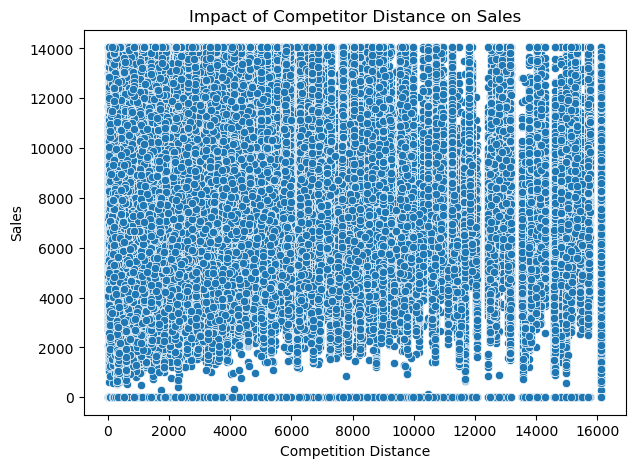

In [57]:
# Function to analyze the impact of competitor distance on sales
def analyze_competitor_distance_effect(data):
    logger.info("Analyzing the impact of competitor distance on sales...")
    try:
        plt.figure(figsize=(7, 5))
        sns.scatterplot(x='CompetitionDistance', y='Sales', data=data)
        plt.title('Impact of Competitor Distance on Sales')
        plt.xlabel('Competition Distance')
        plt.ylabel('Sales')
        plt.show()
        logger.info("Plotted impact of competitor distance on sales.")
    except Exception as e:
        logger.error(f"Error plotting impact of competitor distance on sales: {e}")

try:
    analyze_competitor_distance_effect(train_store)
    logger.info("Graph formed successfully.")
except Exception as e:
    logger.error(f"Error during EDA: {e}")

# Insights 

**No Clear Linear Relationship**:
- **Weak Correlation**: There's no obvious linear trend between competitor distance and sales performance
- **Sales Range Consistency**: Across all competitor distances (0 to 16,000), sales span the full range from near 0 to 14,000+

**Distance-Based Patterns**:
- **Close Competition (0-2,000)**: Dense clustering of data points with full sales range represented
- **Medium Distance (2,000-12,000)**: Consistent performance across all distance ranges
- **Far Competition (12,000+)**: Still shows full sales variability, suggesting distance alone doesn't determine success

**Market Dynamics Insights**:
- **Competition Doesn't Always Hurt**: Many stores perform excellently even with competitors very close by
- **Location Quality Matters More**: Other factors (foot traffic, demographics, store quality) likely outweigh competitor proximity
- **Market Saturation Tolerance**: The market appears able to support multiple competitors in close proximity

**Business Recommendations**:
- **Comprehensive Site Selection**: Use multiple criteria beyond competitor distance
- **Competitive Advantage**: Focus on service quality, product mix, and customer experience rather than avoiding competition
- **Market Research**: Investigate what drives the high-performing stores in competitive areas